### Example of Time Series: Google Trends

Time series analysis deals with data that is ordered in time. Of course, there are many other types of data that are not covered in this course - for example, cross-sectional data that are taken at one point in time. 

Time series come up in many contexts. Here is a time series of the frequency of Google searches for the word "diet" over a five year period. 

<img src="t.jpg" style="max-width:600px">

You can see an interesting pattern: it hits a low around the holidays, and then spikes up at the beginning of the year when people make New Year's resolutions to lose weight.

###  Example of Time Series: Climate Data

Here is another example of a time series: the average annual temperature in New York City since 1870. 

<img src="t-1.jpg" style="max-width:600px">

Notice that this time series is trending up. Many of the most interesting applications of time series analysis are financial time series. 

In this course, you will look at a variety of financial time series: stocks, bonds, commodities, even crytpocurrencies like Bitcoin.

### Example of Time Series: Quarterly Earnings Data

Here is the time series of quarterly earnings for the company H&R Block. 

<img src="t-2.jpg" style="max-width:600px">

H&R Block is in the business of preparing tax returns for customers and selling tax software. The vast majority of their earnings occurs in the quarter that taxes are due. Notice the strong seasonality pattern in the earnings.

###  Example of Multiple Series: Natural Gas and Heating Oil

<img src="t-3.jpg" style="max-width:600px">

Here are the prices of two energy commodities, heating oil and natural gas, which move together.

### Some Useful Pandas Tools

In the course of analyzing time series data, you will use several convenient pandas tools for manipulating times series data. 

<img src="p.jpg" style="max-width:500px">

`to_datetime()` is used to convert an index, often read in as a string, into a datetime index. The `plot` method of pandas is a quick way to plot data, and if the index has been converted to a datetime object, you can slice the data by year, for example. 

<img src="p-1.jpg" style="max-width:500px">

You will sometimes need to `merge or join` two DataFrames. For example, one DataFrame may contain stock prices and another DataFrame may contain bond prices. Pandas makes it easy to resample data. For example, a DataFrame of daily data can be converted to weekly data with the `resample` method

<img src="p-2.jpg" style="max-width:500px">

Often, you will want to convert prices to returns, which you can do with the `pct_change` method. Or if you want differences, you can use the `diff` method. You can compute the `correlation` of two series using the `corr` method, and the `autocorrelation` using the `autocorr` method.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
diet = pd.read_csv("diet.csv")
diet.head()

,Date,diet
0,6/26/2011,70
1,7/3/2011,71
2,7/10/2011,73
3,7/17/2011,74
4,7/24/2011,72


In [3]:
diet = diet.set_index("Date")
diet.head()

,diet
Date,
6/26/2011,70
7/3/2011,71
7/10/2011,73
7/17/2011,74
7/24/2011,72


## Exercise 1: A "Thin" Application of Time Series

Google Trends allows users to see how often a term is searched for. We downloaded a file from Google Trends containing the frequency over time for the search word `"diet"`, which is pre-loaded in a DataFrame called `diet`. 

A first step when analyzing a time series is to `visualize` the data with a plot. You should be able to clearly see a gradual decrease in searches for "diet" throughout the calendar year, hitting a low around the December holidays, followed by a spike in searches around the new year as people make New Year's resolutions to lose weight.

`Like many time series datasets you will be working with, the index of dates are strings and should be converted to a datetime index before plotting`.

- Convert the date index to datetime using pandas's to_datetime()


- Plot the time series and set the argument grid to True to better see the year-ends.


- Slice the diet dataset to keep only values from 2012, assigning to diet2012. Plot the diet2012, again creating gridlines with the grid argument.

In [4]:
diet

,diet
Date,
6/26/2011,70
7/3/2011,71
7/10/2011,73
7/17/2011,74
7/24/2011,72
...,...
5/22/2016,62
5/29/2016,62
6/5/2016,62


In [5]:
diet.index

Index(['6/26/2011', '7/3/2011', '7/10/2011', '7/17/2011', '7/24/2011',
       '7/31/2011', '8/7/2011', '8/14/2011', '8/21/2011', '8/28/2011',
       ...
       '4/17/2016', '4/24/2016', '5/1/2016', '5/8/2016', '5/15/2016',
       '5/22/2016', '5/29/2016', '6/5/2016', '6/12/2016', '6/19/2016'],
      dtype='object', name='Date', length=261)

In [6]:
## q1
diet.index = pd.to_datetime(diet.index)
diet.index

DatetimeIndex(['2011-06-26', '2011-07-03', '2011-07-10', '2011-07-17',
               '2011-07-24', '2011-07-31', '2011-08-07', '2011-08-14',
               '2011-08-21', '2011-08-28',
               ...
               '2016-04-17', '2016-04-24', '2016-05-01', '2016-05-08',
               '2016-05-15', '2016-05-22', '2016-05-29', '2016-06-05',
               '2016-06-12', '2016-06-19'],
              dtype='datetime64[ns]', name='Date', length=261, freq=None)

<Figure size 2000x800 with 0 Axes>

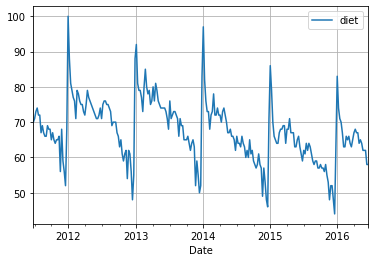

In [7]:
## q2: Plot the entire time series diet and show gridlines
plt.figure(figsize=(10,4), dpi=200)
diet.plot(grid=True)
plt.show()

<Figure size 2000x800 with 0 Axes>

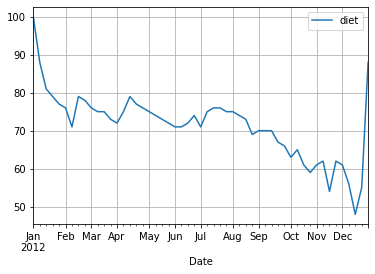

In [10]:
## q3: Slice the dataset to keep only 2012. Plot 2012 data
diet2012 = diet.loc['2012']
#print(diet2012)

plt.figure(figsize=(10,4), dpi=200)
diet2012.plot(grid=True)
plt.show()

In [39]:
Stocks = pd.read_csv("Stocks.csv")
Stocks = Stocks.set_index("observation_date")
Stocks.head()

,SP500
observation_date,
2007-06-11,1509.12
2007-06-12,1493.00
2007-06-13,1515.67
2007-06-14,1522.97
2007-06-15,1532.91


In [40]:
Bonds = pd.read_csv("Bonds.csv")
Bonds = Bonds.set_index("observation_date")
Bonds.head()

,US10Y
observation_date,
2007-06-08,5.12
2007-06-11,5.14
2007-06-12,5.26
2007-06-13,5.20
2007-06-14,5.23


## Exercise 2: Merging Time Series With Different Dates

`Stock` and `bond` markets in the U.S. are `closed` on `different days`. For example, although the bond market is closed on Columbus Day (around Oct 12) and Veterans Day (around Nov 11), the stock market is open on those days. 

One way to see the dates that the stock market is open and the bond market is closed is to `convert` both `indexes` of `dates` into `sets` and take the `difference` in sets.

The pandas `.join()` method is a convenient tool to `merge` the `stock and bond` DataFrames on dates when both markets are `open`.

Stock prices and 10-year US Government bond yields, which were downloaded from FRED, are pre-loaded in DataFrames stocks and bonds.

- Convert the dates in the stocks.index and bonds.index into sets.


- Take the difference of the stock set minus the bond set to get those dates where the stock market has data but the bond market does not.


- Merge the two DataFrames into a new DataFrame, stocks_and_bonds using the .join() method, which has the syntax df1.join(df2). To get the intersection of dates, use the argument how='inner'.

In [41]:
# Convert the stock index and bond index into sets
set_stock_dates = set(Stocks.index)
set_bond_dates = set(Bonds.index)

# Take the difference between the sets and print
print(f'Total closed days for Stock and Bond market from 2008-17 are {len(set_stock_dates - set_bond_dates)} days \n')
print(set_stock_dates - set_bond_dates)

Total closed days for Stock and Bond market from 2008-17 are 21 days 

{'2008-10-13', '2015-11-11', '2007-10-08', '2008-11-11', '2011-11-11', '2013-10-14', '2012-10-08', '2010-11-11', '2014-10-13', '2013-11-11', '2016-11-11', '2012-11-12', '2009-11-11', '2010-10-11', '2014-11-11', '2011-10-10', '2007-11-12', '2009-10-12', '2016-10-10', '2017-06-09', '2015-10-12'}


In [42]:
# Merge stocks and bonds DataFrames using join()
stocks_and_bonds = Stocks.join(Bonds, how = 'inner')
print(f'Total common opening days for Stock and Bond market from 2008-17 are {len(stocks_and_bonds)} days \n')
print(stocks_and_bonds)

Total common opening days for Stock and Bond market from 2008-17 are 2498 days 

                    SP500  US10Y
observation_date                
2007-06-11        1509.12   5.14
2007-06-12        1493.00   5.26
2007-06-13        1515.67   5.20
2007-06-14        1522.97   5.23
2007-06-15        1532.91   5.16
...                   ...    ...
2017-06-02        2439.07   2.15
2017-06-05        2436.10   2.18
2017-06-06        2429.33   2.14
2017-06-07        2433.14   2.18
2017-06-08        2433.79   2.19

[2498 rows x 2 columns]


### Correlation of Two Time Series

Often, two time series vary together. Here is a plot of the stock prices of JP Morgan and the S&P500. 

<img src="c.jpg" style="max-width:500px">

You can see from this plot that, in general, when the market drops, JP Morgan drops as well, and when the market rises, JP Morgan also rises.

<img src="c-1.jpg" style="max-width:500px">

A scatter plot of the returns of JP Morgan and the returns of the market help to visualize the relationship between the two time series. The correlation coefficient is a measure of how much two series vary together. 

<img src="c-2.jpg" style="max-width:500px">


- A correlation of one means that the two series have a perfect linear relationship with no deviations. 

- High correlations mean that the two series strongly vary together. 

- A low correlation means they vary together, but there is a weak association.

- And a high negative correlation means they vary in opposite directions, but still with a linear relationship.



### Common Mistake: Correlation of Two Trending Series

Consider two time series that are both trending. Even if the two series are totally unrelated, you could still get a very high correlation. That's why, when you look at the correlation of say, two stocks, you should look at the correlation of their `*returns*`, `not` their `levels`. 

<img src="c-3.jpg" style="max-width:500px">

In this example, the two series, `stock prices` and `UFO sightings`, both trend up over time. Of course, there is `no relationship` between those two series, but the correlation is `0.94`. If you compute the `correlation of percent changes`, the correlation goes down to `approximately zero`.


###  Example: Correlation of Large Cap and Small Cap Stocks

Now you'll see how to compute the correlation of two financial time series, the S&P500 index of large cap stocks and the Russell 2000 index of small cap stocks, using the pandas correlation method. 

- First compute the percent changes using the pct_change method. This gives the returns of these series instead of prices. You can also visualize the correlation with a scatter plot.


<img src="c-4.jpg" style="max-width:500px">

<img src="c-5.jpg" style="max-width:500px">


- Then, use the pandas correlation method for Series. The correlation between large cap and small cap stocks is very high: 0.868

<img src="c-6.jpg" style="max-width:500px">


In [43]:
stocks_and_bonds.head()

,SP500,US10Y
observation_date,,
2007-06-11,1509.12,5.14
2007-06-12,1493.00,5.26
2007-06-13,1515.67,5.20
2007-06-14,1522.97,5.23
2007-06-15,1532.91,5.16


## Exercise 3: Correlation of Stocks and Bonds

`Investors` are often `interested` in the `correlation between the returns` of two different assets for `asset allocation` and `hedging purposes`. 

In this exercise, you'll try to answer the question of whether `stocks` are `positively or negatively correlated` with `bonds`. Scatter plots are also useful for visualizing the correlation between the two variables.

Keep in mind that you should compute the correlations on the `percentage changes` rather than the `levels`.

Stock prices and 10-year bond yields are combined in a DataFrame called `stocks_and_bonds` under columns `SP500` and `US10Y`


- Compute percent changes on the `stocks_and_bonds` DataFrame using the `.pct_change()` method and call the new DataFrame `returns`.


- `Compute the correlation` of the columns `SP500 and US10Y` in the `returns` DataFrame using the `.corr()` method for Series which has the syntax `series1.corr(series2)`.


- Show a scatter plot of the `percentage change` in `stock` and `bond` yields.

In [44]:
returns = stocks_and_bonds.pct_change()
returns

,SP500,US10Y
observation_date,,
2007-06-11,NaN,NaN
2007-06-12,-0.010682,0.023346
2007-06-13,0.015184,-0.011407
2007-06-14,0.004816,0.005769
2007-06-15,0.006527,-0.013384
...,...,...
2017-06-02,0.003708,-0.027149
2017-06-05,-0.001218,0.013953
2017-06-06,-0.002779,-0.018349


In [45]:
correlation = returns['SP500'].corr(returns["US10Y"])
print("Correlation of stocks and interest rates: ", correlation)

Correlation of stocks and interest rates:  0.4119448886249272


In [46]:
import matplotlib.pyplot as plt

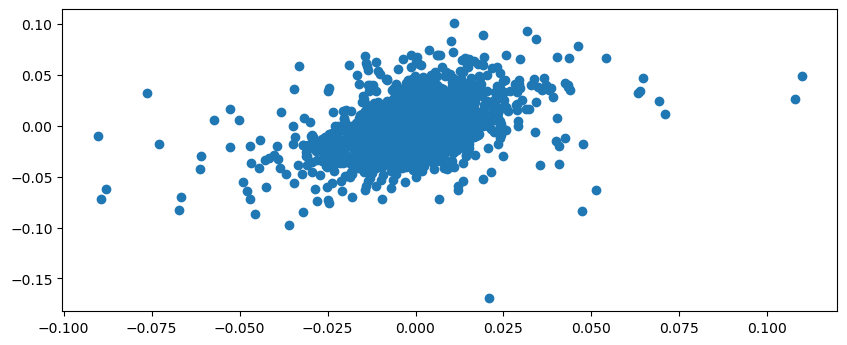

In [47]:
plt.figure(figsize=(10,4), dpi=100)
plt.scatter(returns['SP500'], returns["US10Y"])
plt.show()

In [49]:
levels  = pd.read_csv("levels.csv")
levels = levels.set_index("Date")
levels

,DJI,UFO
Date,,
1941,110.96,1
1942,119.40,2
1943,135.89,9
1944,152.32,9
1945,192.91,9
...,...,...
2009,10428.05,4541
2010,11577.51,4283
2011,12217.56,5107


## Exercise 4: Flying Saucers Aren't Correlated to Flying Markets

Two trending series may show a strong correlation even if they are completely unrelated. This is referred to as "spurious correlation". That's why when you look at the correlation of say, two stocks, you should look at the correlation of their returns and not their levels.

To illustrate this point, calculate the correlation between the levels of the stock market and the annual sightings of UFOs. Both of those time series have trended up over the last several decades, and the correlation of their levels is very high.

Then calculate the correlation of their percent changes. This will be close to zero, since there is no relationship between those two series.

The DataFrame `levels` contains the levels of `DJI` and `UFO`.

- Calculate the correlation of the columns DJI and UFO.


- Create a new DataFrame of changes using the .pct_change() method.


- Re-calculate the correlation of the columns DJI and UFO on the changes.

In [51]:
corr = levels["DJI"].corr(levels["UFO"])
corr

0.9399762210726428

<AxesSubplot:xlabel='Date'>

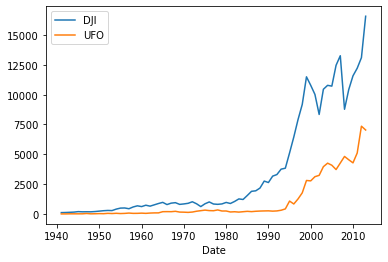

In [55]:
levels.plot()

In [52]:
new_df = levels.pct_change()
new_df.head()

,DJI,UFO
Date,,
1941,NaN,NaN
1942,0.076063,1.0
1943,0.138107,3.5
1944,0.120907,0.0
1945,0.266478,0.0


In [54]:
new_corr = new_df["DJI"].corr(new_df["UFO"])
new_corr

0.06026935462405373

<AxesSubplot:xlabel='Date'>

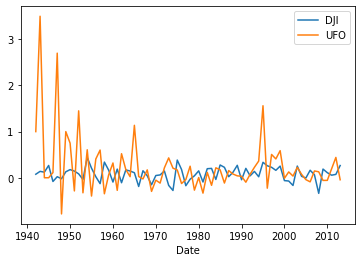

In [56]:
new_df.plot()

### What is a Regression?

Now, you'll learn about simple linear regressions of time series. A simple linear regression finds the slope, beta, and intercept, alpha, of a line that's the best fit between a dependent variable, y, and an independent variable, x. The x's and y's can be two time series.

<img src="lr.jpg" style="max-width:500px">

A linear regression is also known as Ordinary Least Squares, or OLS, because it minimizes the sum of the squared distances between the data points and the regression line.


### Python Packages to Perform Regressions

Regression techniques are very common, and therefore there are many packages in Python that can be used. 

<img src="lr-1.jpg" style="max-width:500px">

- In statsmodels, there is OLS. 


- In numpy, there is polyfit, and if you set degree equals 1, it fits the data to a line, which is a linear regression. 


- Pandas has an ols method, and 


- scipy has a linear regression function. 


Beware that the order of x and y is not consistent across packages. All these packages are very similar, and in this course, you will use the statsmodels OLS.


### Example: Regression of Small Cap Returns on Large Cap

Now you'll regress the returns of the small cap stocks on the returns of large cap stocks. Compute returns from prices using the "pct_change" method in pandas. 

<img src="lr-2.jpg" style="max-width:500px">

You need to add a column of ones as a dependent, right hand side variable. The reason you have to do this is because the regression function assumes that if there is no constant column, then you want to run the regression without an intercept. By adding a column of ones, statsmodels will compute the regression coefficient of that column as well, which can be interpreted as the intercept of the line. The statsmodels method `"add constant"` is a simple way to add a constant.

<img src="lr-3.jpg" style="max-width:500px">

Notice that the first row of the return series is NaN. Each return is computed from two prices, so there is one less return than price. 

To delete the first row of `NaN's`, use the pandas method `"dropna"`. You're finally ready to run the regression. 

The first argument of the statsmodel regression is the series that represents the dependent variable, y, and the next argument contains the independent variable or variables. 

In this case, the dependent variable is the R2000 returns and the independent variables are the constant and SPX returns. The method `"fit"` runs the regression and results are saved in a class instance called results.

<img src="lr-4.jpg" style="max-width:800px">

The summary method of results shows the entire regression output. We will only focus on a few items of the regression results. 

In the red box, the `coefficent 1.1412` is the `slope` of the regression, which is also referred to as `beta`. 

The coefficient above that is the `intercept`, which is very close to zero. 

You can also pull out individual items from results, like the `intercept`, in `results-dot-params zero`, and the `slope`, in `results-dot-params one`. 

Another statistic to take note of is the `R-Squared` of `0.753`.

### Relationship Between R-Squared and Correlation

From the scatter diagrams, you saw that the correlation measures how closely the data are clustered along a line. The R-squared also measures how well the linear regression line fits the data. So as you would expect, there is a relationship between correlation and R-squared. 

<img src="r.jpg" style="max-width:500px">

- The magnitude of the correlation is the square root of the R-squared. 

- And the sign of the correlation is the sign of the slope of the regression line. If the regression line is positively sloped, the correlation is positive and if the the regression line is negatively sloped, the correlation is negative. 

- In the example you just analyzed, of large cap and small cap stocks, the R-Squared was 0.753, the slope of the regression was positive, so the correlation is then positive the square root of 0.753, or 0.868, which can be verified by computing the correlation directly.

In [61]:
df = pd.read_csv("x_y.csv")
df.head()

,x,y
0,1.281155,-0.835129
1,-0.612631,-0.061004
2,0.933222,-0.194677
3,2.269327,-2.461142
4,-1.427691,1.040073


In [64]:
import statsmodels.api as sm

## Exercise 5: Looking at a Regression's R-Squared

R-squared measures how closely the data fit the regression line, so the R-squared in a simple regression is related to the correlation between the two variables. In particular, the magnitude of the correlation is the square root of the R-squared and the sign of the correlation is the sign of the regression coefficient.

In this exercise, you will start using the statistical package statsmodels, which performs much of the statistical modeling and testing that is found in R and software packages like SAS and MATLAB.

You will take two series, x and y, compute their correlation, and then regress y on x using the function OLS(y,x) in the statsmodels.api library (note that the dependent, or right-hand side variable y is the first argument). Most linear regressions contain a constant term which is the intercept (the  in the regression 
). To include a constant using the function OLS(), you need to add a column of 1's to the right hand side of the regression.

The module statsmodels.api has been imported for you as sm.

- Compute the correlation between x and y using the .corr() method.

- Run a regression: First convert the Series x to a DataFrame dfx. Add a constant using sm.add_constant(), assigning it to dfx1


- Regress y on dfx1 using sm.OLS().fit().


- Print out the results of the regression and compare the R-squared with the correlation.

In [62]:
# Compute correlation of x and y
correlation = df['x'].corr(df['y'])
print("The correlation between x and y is %.2f" %(correlation))

The correlation between x and y is -0.90


In [66]:
# Convert the Series x to a DataFrame and name the column x
dfx = pd.DataFrame(df['x'], columns=['x'])
print(dfx.head(), '\n')

# Add a constant to the DataFrame dfx
dfx1 = sm.add_constant(dfx)
print(dfx1.head())

          x
0  1.281155
1 -0.612631
2  0.933222
3  2.269327
4 -1.427691 

   const         x
0    1.0  1.281155
1    1.0 -0.612631
2    1.0  0.933222
3    1.0  2.269327
4    1.0 -1.427691


In [67]:
# Regress y on dfx1
result = sm.OLS(df['y'], dfx1).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     4471.
Date:                Mon, 28 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:47:49   Log-Likelihood:                -560.10
No. Observations:                1000   AIC:                             1124.
Df Residuals:                     998   BIC:                             1134.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0052      0.013     -0.391      0.6